# <p style="text-align: center;">EE 380L: Data Mining</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 85 </p>
## <p style="text-align: center;">Due: September 29th(09/29/2020) submitted via Canvas by 11:59 pm</p>
## <p style="text-align: center;">Kewei Xu(kx625) and Yifu Huang (yh9692)</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UT eID for both students.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)*

For the descriptive questions, you can write down the solution in paper and embed a picture of it to the notebook or type it out.

# Package version
matplotlib 3.1.2

sklearn 0.0

# Question 1 - Regularized regression (40 pts)
The data given is in "data.csv" - this is same fish dataset from the previous assignment, in this question you will explore the application of Lasso and Ridge regression using sklearn package in Python.

* Use the below code to load the dataset given in data.csv. Create a train_test split of 75:25 with random state = 50

* Scale the data so that each of the independent variables have zero mean and unit variance. You can use the [sklearn.preprocessing.scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) function for this.

In [21]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None


df = pd.read_csv("data.csv", index_col=0)
df = df[~df.isin([0, np.nan, np.inf, -np.inf]).any(1)]

X = df.drop(['Weight'], axis=1)
y = df['Weight']

In [22]:
from sklearn.preprocessing import scale
X_s = scale(X)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size = 1/4, random_state=50)

a) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-2,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MSE as the scoring metric. (8pts)

b) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot. What do you qualitatively observe when value of the regularization parameter is changed? (7pts)

c) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MAE), Mean Squared Error(MSE) and ${R^2}$ on the test data for each. (5pts)

d) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for all variables. (5pts)

e) Why did we have to scale the data before regularization? (5pts)

f) Lasso and ridge regularization techniques are often used to combat overfitting during linear regression. Which of the two yields more sparse models (i.e. fewer number of parameters) when the tuning parameter $\lambda$ is sufficiently large (but not infinite)? (5 pts)

g) Run ElasticNet with the same values of alphas on the training data, and find the best value for alpha using MSE. Report the ${R^2}$ on test data and plot a graph showing the predictions and actual labels. Explain the results comparing the three regression models.(5 pts)

In [24]:
# a) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes 
#    to do a 5-fold cross validation using sklearn's KFold. 
#    For the sweep of the regularization parameter, 
#    we will look at a grid of values ranging from  𝜆=10^10  to  𝜆=10^−2. 
#    Report the best chosen  𝜆  based on cross validation. 
#    The cross validation should happen on your training data using average MSE as the scoring metric. (8pts)

from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge, Lasso

import numpy as np
import matplotlib.pyplot as plt

n_folds = 5
kf = KFold(n_folds)
kf.get_n_splits(X_train)
alphas =  10 ** np.linspace(10, -2, 100) * 0.5
lasso_avg_rmse = {}
ridge_avg_rmse = {}

for alpha in alphas:
    lasso = Lasso(alpha = alpha, max_iter = 1000000)
    avg_mse = 0
    for train_index, test_index in kf.split(X_train):
        lasso.fit(X_train[train_index], y_train[train_index])
        avg_mse = avg_mse + mean_squared_error(y_train[test_index], lasso.predict(X_train[test_index])) 
    lasso_avg_rmse[alpha] = avg_mse / n_folds
best_alpha_lasso = min(lasso_avg_rmse, key = lasso_avg_rmse.get)
print("Best lasso λ: {0}, Best MSE: {1}".format(best_alpha_lasso, lasso_avg_rmse[best_alpha_lasso]))

for alpha in alphas:
    ridge = Ridge(alpha = alpha, max_iter = 1000000)
    avg_mse = 0
    for train_index, test_index in kf.split(X_train):
        ridge.fit(X_train[train_index], y_train[train_index])
        avg_mse = avg_mse + mean_squared_error(y_train[test_index], ridge.predict(X_train[test_index])) 
    ridge_avg_rmse[alpha] = avg_mse / n_folds
best_alpha_ridge = min(ridge_avg_rmse, key = ridge_avg_rmse.get)
print("Best ridge λ: {0}, Best MSE: {1}".format(best_alpha_ridge, ridge_avg_rmse[best_alpha_ridge]))

Best lasso λ: 0.5748784976988678, Best MSE: 17402.0018798434
Best ridge λ: 16.372745814388658, Best MSE: 16899.14986242799


In [25]:
# b) Run ridge and lasso for all of the alphas specified above (on training data), 
#    and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, 
#    so a total of two plots; the plots for different features for a method should be on the same plot. 
#    What do you qualitatively observe when value of the regularization parameter is changed? (7pts)

cof_lasso, cof_ridge = [], []

for a in alphas:
    regression_lasso = Lasso(alpha = a, max_iter = 1000000)
    regression_lasso.fit(X_train, y_train)
    cof_lasso.append(regression_lasso.coef_)
    
    regression_ridge = Ridge(alpha = a, max_iter = 1000000)
    regression_ridge.fit(X_train, y_train)
    cof_ridge.append(regression_ridge.coef_)
    

Text(0, 0.5, 'Coefficient')

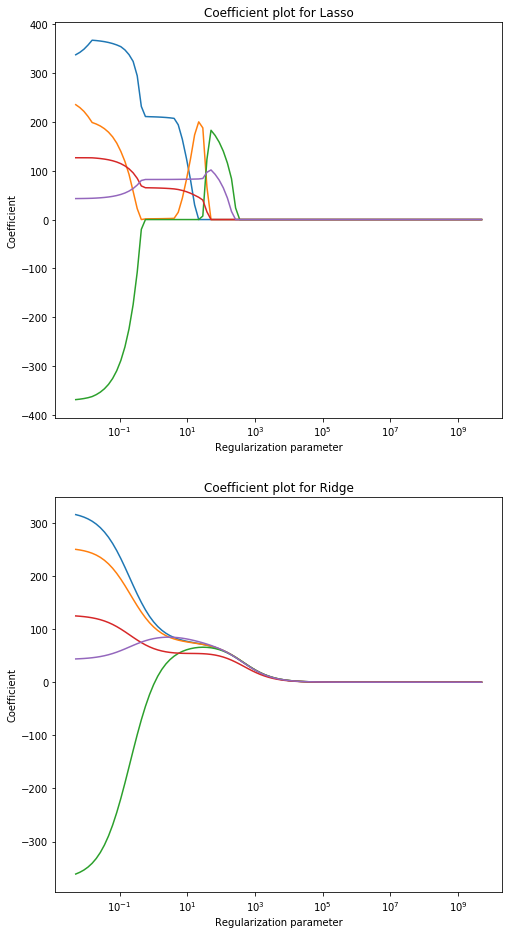

In [26]:
plt.figure(1, figsize = (8, 16))
ax_1 = plt.subplot(2, 1, 1)
plt.semilogx(alphas, cof_lasso)
ax_1.set_title('Coefficient plot for Lasso')
plt.xlabel('Regularization parameter')
plt.ylabel('Coefficient')

ax_2 = plt.subplot(2, 1, 2)
plt.semilogx(alphas, cof_ridge)
ax_2.set_title('Coefficient plot for Ridge')
plt.xlabel('Regularization parameter')
plt.ylabel('Coefficient')

For both the Lasso and Ridge methods, the coefficients will become 0 when $\lambda$ is large enough. For the Lasso method, the coefficient becomes 0 earlier than the Ridge and can generate different models when $\lambda$ is diffrent. But for the Ridge method, the change is more smooth and all the coefficients will become 0 when $\lambda$ reaches a same value.

In [27]:
# c) Run least squares regression, ridge, and lasso on the training data. 
#    For ridge and lasso, use only the best regularization parameter. 
#    Report the prediction error (MAE), Mean Squared Error(MSE) and  𝑅2  on the test data for each. (5pts)

regression_lasso = Lasso(alpha = best_alpha_lasso, max_iter = 1000000)
regression_lasso.fit(X_train, y_train)
mse_lasso = mean_squared_error(regression_lasso.predict(X_test), y_test)
mae_lasso = mean_absolute_error(regression_lasso.predict(X_test), y_test)
r2_lasso = r2_score(regression_lasso.predict(X_test), y_test)

regression_ridge = Ridge(alpha = best_alpha_ridge, max_iter = 1000000)
regression_ridge.fit(X_train, y_train)
mse_ridge = mean_squared_error(regression_ridge.predict(X_test), y_test)
mae_ridge = mean_absolute_error(regression_ridge.predict(X_test), y_test)
r2_ridge = r2_score(regression_ridge.predict(X_test), y_test)

regression_linear = linear_model.LinearRegression()
regression_linear.fit(X_train, y_train)
mse_linear = mean_squared_error(regression_linear.predict(X_test), y_test)
mae_linear = mean_absolute_error(regression_linear.predict(X_test), y_test)
r2_linear = r2_score(regression_linear.predict(X_test), y_test)

print("Lasso MSE:", mse_lasso)
print("Lasso MAE:", mae_lasso)
print("Lasso R^2:", r2_lasso)
print("Ridge MSE:", mse_ridge)
print("Ridge MAE:", mae_ridge)
print("Ridge R^2:", r2_ridge)
print("Least squares MSE:", mse_linear)
print("Least squares MAE:", mae_linear)
print("Least squares R^2:", r2_linear)

Lasso MSE: 16741.865481904108
Lasso MAE: 99.68791588279839
Lasso R^2: 0.889192935924203
Ridge MSE: 17102.465955427877
Ridge MAE: 101.72767183151299
Ridge R^2: 0.8794745322812632
Least squares MSE: 16780.354790542042
Least squares MAE: 97.81799831813109
Least squares R^2: 0.8867601817945082


In [28]:
# d) Run lasso again with cross validation using sklearn.linear_model.LassoCV. 
#    Set the cross validation parameters as follows:
#    LassoCV(alphas=None, cv=10, max_iter=10000)
#    Report the best 𝜆 based on cross validation. 
#    Run lasso on the training data using the best 𝜆 and report the coefficeints for all variables. (5pts)

from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 100000)
regression_lasso_cv = lasso_cv.fit(X_train, y_train)
lambda_optimal = regression_lasso_cv.alpha_
coef = regression_lasso_cv.coef_

print("Best lambda: ", lambda_optimal)
print("Coefficient: ", coef)

Best lambda:  0.7125553072694414
Coefficient:  [210.77139895   1.51957951  -0.          65.07565615  82.10563001]


e) Why did we have to scale the data before regularization? (5pts)

ANSWER: 
    
1. The scaling process makes training less sensitive to the scale of features.
    
2. Regularization behaves differently for different scaling.
    
3. It gives consistency for comparing results across models.
    
4. It makes optimization well-conditioned.

f) Lasso and ridge regularization techniques are often used to combat overfitting during linear regression. Which of the two yields more sparse models (i.e. fewer number of parameters) when the tuning parameter 𝜆 is sufficiently large (but not infinite)? (5 pts)

ANSWER: Lasso yields more sparse models. For a large 𝜆, more features in Lasso goes to 0 than Ridge.

Best ElasticNet λ: 0.005, Best MSE: 14397.920210924976
ElasticNet R^2: 0.8881433719376358


Text(0, 0.5, 'Coefficient')

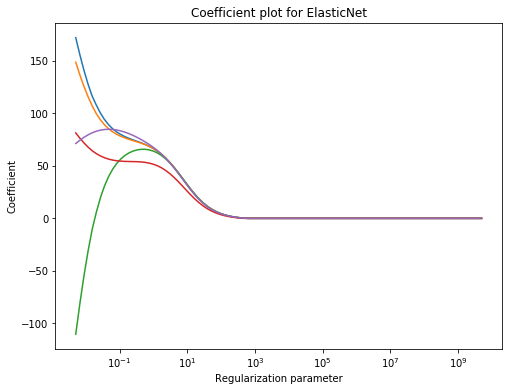

In [30]:
# g) Run ElasticNet with the same values of alphas on the training data, 
#    and find the best value for alpha using MSE. Report the 𝑅2 on test data 
#    and plot a graph showing the predictions and actual labels. 
#    Explain the results comparing the three regression models.(5 pts)

from sklearn.linear_model import ElasticNet

alphas =  10 ** np.linspace(10, -2, 100) * 0.5
ENet_mse = {}
cof_ENet = []

for alpha in alphas:
    ENet = ElasticNet(alpha = alpha, max_iter = 1000000)
    ENet.fit(X_train, y_train)
    cof_ENet.append(ENet.coef_)
    ENet_mse[alpha] = mean_squared_error(y_train, ENet.predict(X_train)) 
best_alpha_ENet = min(ENet_mse, key = ENet_mse.get)

print("Best ElasticNet λ: {0}, Best MSE: {1}".format(best_alpha_ENet, ENet_mse[best_alpha_ENet]))

r2_ENet = r2_score(ENet.predict(X_test), y_test)
print("ElasticNet R^2:", r2_ENet)

plt.figure(2).set_size_inches(8, 6)
ax_3 = plt.subplot(1, 1, 1)
plt.semilogx(alphas, cof_ENet)
ax_3.set_title('Coefficient plot for ElasticNet')
plt.xlabel('Regularization parameter')
plt.ylabel('Coefficient')

# Practice Problem - Linear Regression: Least Squares and MLE (Not to be submitted)  
This question is a practise for you all to understand mathematically the assumptions of linear regression model. 

Consider linear regression with a single independent variable. Thus, predicted values are given by:  
$$y  = w_0  + w_1 x$$

Mathematically show that if the assumptions behind linear regression hold (slide 3 of the MLR slides), then the values of $w_0$ and $w_1$ obtained by minimizing MSE are indeed the  maximum likelihood solution of the corresponding underlying probability model relating the target variable to the input variable.

# Question 2 - Linear Regression: Regularizaton - Least Squares and MLE (5 pts)
Consider linear regression with an additional regularization term. The, predicted values are given by:  
$$\textrm{min}_{\beta} \Bigg\{\sum_{i}(y_{i}-\beta x_i{'})^2 \Bigg\} + \lambda \beta^2$$ 


where in this problem $y_i$, $x_i$, and $\beta$ are all scalars. Find a formula for $\beta$ that minimizes the equation above and prove that $\beta$ minimizes the equation above. $\lambda$ is a positive constant


# Answer
$\beta= \frac{\sum_{i}(y_{i}x_i{'})}{ \sum_{i}(x_i{'}^{2})+\lambda}$  
The answer is obtained by taking the first derivative of the objective fuction and solve it equal to zero, namely:  
$\frac{d \{\sum_{i}(y_{i}-\beta x_i{'})^2 \} + \lambda \beta^2}{d\beta}=0$.  
If the minimum of the objective function does exist, solving the equation above will give the optimal $\beta$ that minimize the objective function.  
Taking the derivative:  
$\sum_{i}(-2 x_i{'} y_{i} + 2 \beta x_i{'}^2)  + 2 \lambda \beta=0$.  
Reaarange the above equation will result in the solution given in the beginning. 

# Question 3 - Finding ${R^2}$ (10 pts)

Suppose we are given samples generated according to

$y_i$ = $8x_i$ + $w_i$
where $w_i$ and $x_i$ are $N(0,1)$. 

Assume we have infinite samples.

(a) What will be the linear regression predictor $\hat{\beta}$ ? (5 pts)

(b) What will be the ${R^2}$ of this $\hat{\beta}$  ? (5 pts)

# Answer
(a) $\hat{\beta }=[0, 8]$

We need to optimize the MSE

$$min: MSE=\frac{1}{N}\sum_{i}^{N}(\hat{\beta}(x_i)-y_i)^2$$
$$\frac{dMSE}{d\beta_1}=\frac{1}{N}\sum_{i}^{N}2x_i(\beta_1x_i-y_i)-{\beta_0}x_i=0$$
$$\frac{dMSE}{d\beta_0}=\frac{1}{N}\sum_{i}^{N}2{\beta_0}+y_i-{\beta_1}x_i=0$$

We can get:

$$\beta_0=\frac{\sum y_i-m\sum x_i}{N}$$
$$\beta_1=\frac{\frac{1}{N}\sum x_iy_i-\frac{1}{N^{2}}\sum x_i\sum y_i}{\frac{1}{N}\sum (x_i)^2-\frac{1}{N^{2}}(\sum x_i)^{2}}$$

When N is finite:

$$\frac{1}{N}\sum x_i=0$$
$$\frac{1}{N}\sum x_i^2=1$$
$$\frac{1}{N}\sum x_iy_i=8$$

Thus we get:

$$\beta_0 = 0$$
$$\beta_1 = 8$$

(b) $R^{2}=1-0.015384=0.984615$

Use the formula of $R^2$

$$R^2=1-\frac{\sum_{i}^{}(\beta x_i-y_i)^2}{\sum_{i}^{}(\bar{y_i}-y_i)^2}=1-\frac{\sum_{i}^{}w_i^2}{\sum_{i}^{}y_i^2}$$
$$\frac{\sum_{i}^{}w_i^2}{\sum_{i}^{}y_i^2}=\frac{\frac{1}{N}\sum_{i}^{}w_i^2}{\frac{1}{N}\sum_{i}^{}(64x_i^2+w_i^2+16x_iw_i)}=1/(64+1+0)=0.015384$$

# Question 4 - Collinearity in Multiple Linear Regression (5pts)
What do you understand by the collinearity problem that can be encountered in MLR? Suggest one way of alleviating this problem.

# Answer
Multicollinearity happens when independent variables in the regression model are highly correlated to each other. This problem arises when there is an approximate linear relationship among two or more independent variables. It makes it hard for interpretation of model and also creates overfitting problem.

Possible methods of alleviating collinearity:

1. Remove some variables that are highly correlated to others and leave the more significant ones in the set.
2. Obtain more data.
3. Mean-center the predictor variables.
4. Standardize the independent variables.

# Question 5 - Bias - Variance (5 pts)
Suppose you learn a ridge regression based on some of the independent variables available to you,
and including a few interaction terms as well. Your result is disappointing, and you believe that the model is
suffering from either too much bias or too much variance. Describe briefly how you will test which alternative is
more likely to be true. (there is no extra data that you can use, so “get more data” is not an option).


# Answer
To figure out the model is contained with too much bias or too much variance, one solution would be manipulate the model complexity via regularization. By increasing the value of $\lambda$, the model complexity is increased and vise versa. Suppose in our original model, $\lambda = \lambda^*$. We could compute the MSE on both testing set and training set with one new $\lambda$ slightly larger than $\lambda^*$, i.e. $\lambda_1>\lambda^*$. If the MSE of both testing set and training set reduce by approximately the same percentage, we can conclude that the current model is suffering more bias than variance. If the MSE of testing set reduces, but MSE of training set increases, we can conclude that the current model is suffering more variance than bias.

# Question 6 (20 pts): 

We want to build a model that can predict y for unknown inputs x.(15 pts)

(a) (5 pts) Fit a linear model to the training data, and report mean squared error on the test data. Plot the data (y_train vs x_train and y_test vs x_test) and predictions on the test set (prediction on x_test vs x_test), clearly denoting the training, testing, and predicted points. All the plots must be in the same figure and be clearly labeled.

(b) (10 pts) Fit polynomial models of degrees 2, 3, 4, 6 and 8 to the training data, Report mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (prediction on x_all by different models vs x_all), and the predictions on the test set (prediction on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled.


(c) (5 pts) Which model performed the best? Explain using the bias-variance tradeoff.


* Use the below code to load the data from the file 'ps01.data'. It is organized as a dictionary, of train and test data.

In [1]:
from sklearn import linear_model as lm
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# code here

data_load = np.load('ps01.data',allow_pickle=True)
x_train = data_load.item().get("Xtrain")
y_train = data_load.item().get("Ytrain")
x_test = data_load.item().get("Xtest")
y_test = data_load.item().get("Ytest")
x_all = np.linspace(-10,10,101).reshape(-1,1)

In [2]:
y_train.shape

(70, 1)

In [3]:
x_test.shape

(30, 1)

In [4]:
x_all.shape

(101, 1)

In [5]:
min(x_train)

array([-3.96224988])

# (a)

In [6]:
regressor = lm.LinearRegression()  
regressor.fit(x_train, y_train) #training the algorithm
y_test_pred = regressor.predict(x_test)
MSE = mean_squared_error(y_test_pred, y_test)
print("This is the MSE on test set: ", MSE)

This is the MSE on test set:  38.29023113306529


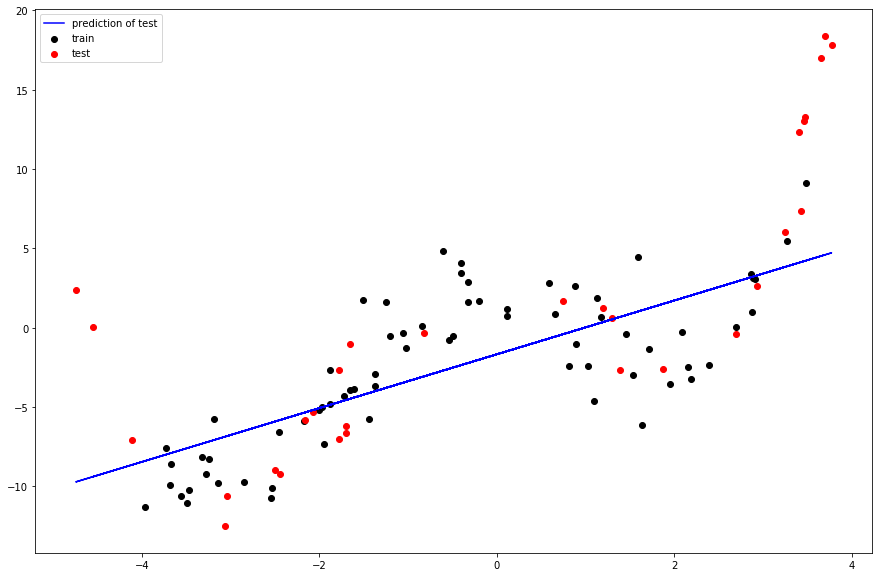

In [7]:
fig = plt.figure(figsize=(15,10))

plt.scatter(x_train, y_train, color='black',label = 'train')
plt.scatter(x_test, y_test, color='red',label='test')
plt.plot(x_test,y_test_pred, color='blue',label='prediction of test')
plt.legend(loc='upper left')
plt.show()

# (b)

MSE in test  set of degree 2 polynomial regression:  66.9397089976283
MSE in train set of degree 2 polynomial regression:  8.373763650678677
MSE in test  set of degree 3 polynomial regression:  62.60567142757909
MSE in train set of degree 3 polynomial regression:  7.464914213471165
MSE in test  set of degree 4 polynomial regression:  4.565136137796623
MSE in train set of degree 4 polynomial regression:  3.9878737628026295
MSE in test  set of degree 6 polynomial regression:  42.81018710643096
MSE in train set of degree 6 polynomial regression:  3.601558023011234
MSE in test  set of degree 8 polynomial regression:  145.89190193710866
MSE in train set of degree 8 polynomial regression:  3.5598285269243894


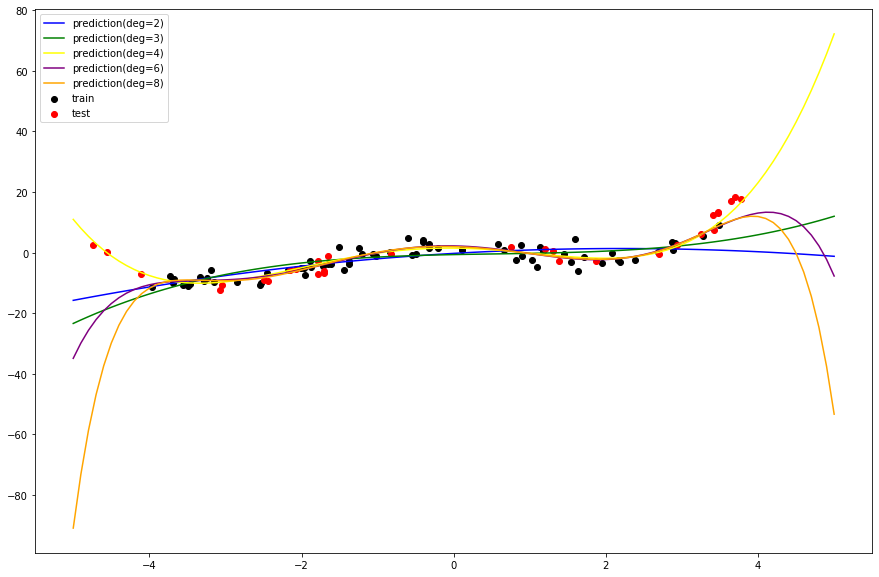

In [8]:
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

fig2 = plt.figure(figsize=(15,10))
plt.scatter(x_train, y_train, color='black',label = 'train')
plt.scatter(x_test, y_test, color='red',label='test')

x_all = np.linspace(-5,5,101).reshape(-1,1)
MSE_test_list=np.zeros(5)
MSE_train_list=np.zeros(5)
y_all_pred_list=np.zeros((101,5))
count=0
for degree in [2,3,4,6,8]:
    #degree=2
    polyreg=make_pipeline(PolynomialFeatures(degree),lm.LinearRegression())
    polyreg.fit(x_train,y_train)
    y_test_pred = polyreg.predict(x_test)
    y_train_pred = polyreg.predict(x_train)
    MSE_test = mean_squared_error(y_test_pred,y_test)
    MSE_train = mean_squared_error(y_train_pred,y_train)
    print("MSE in test  set of degree", degree, "polynomial regression: ", MSE_test)
    print("MSE in train set of degree", degree, "polynomial regression: ", MSE_train)
    MSE_test_list[count] = MSE_test
    MSE_train_list[count] = MSE_train
    y_all_pred = polyreg.predict(x_all)
    y_all_pred_list[:,count] = y_all_pred.reshape((101,))
    count = count+1
    
plt.plot(x_all,y_all_pred_list[:,0], color='blue',label='prediction(deg=2)')
plt.plot(x_all,y_all_pred_list[:,1], color='green',label='prediction(deg=3)')
plt.plot(x_all,y_all_pred_list[:,2], color='yellow',label='prediction(deg=4)')
plt.plot(x_all,y_all_pred_list[:,3], color='purple',label='prediction(deg=6)')
plt.plot(x_all,y_all_pred_list[:,4], color='orange',label='prediction(deg=8)')
plt.legend(loc='upper left')
plt.show()

# (c)

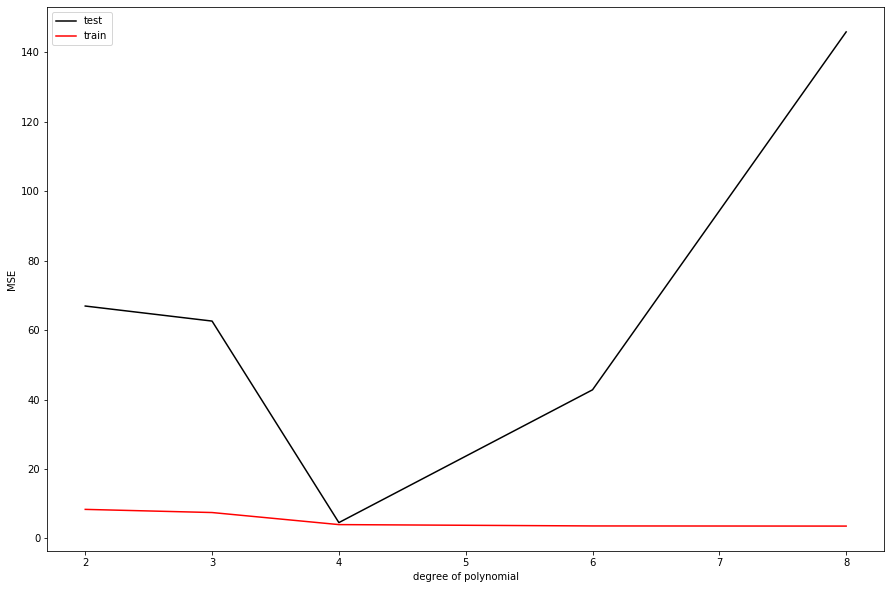

In [9]:
x_axis = np.array([2,3,4,6,8])
fig = plt.figure(figsize=(15,10))
plt.plot(x_axis, MSE_test_list, color='black',label = 'test')
plt.plot(x_axis, MSE_train_list, color='red',label='train')
#plt.plot(x_all,y_all_pred, color='blue',label='prediction of test')
plt.legend(loc='upper left')
plt.xlabel("degree of polynomial")
plt.ylabel("MSE")
plt.show()

Discussion:  Which model performed the best? Explain using the bias-variance tradeoff.  
The 4th order polynomiol model performed the best. In 2nd and 3rd order polynomial model, the MSE of the model is high on both training and testing set, which indicates high bias on this model. In 6th and 8th order polynomial model, the MSE of the model on training set slightly decreases comparing to lower orders. However, the MSE on testing set increase tremendously. This indicates the model is overfitting on the training data and the variances of the model is high. In 4th order polynomial model, MSE of test and training set are both low, so it's the model performing the best.